In [27]:

import os

import pandas as pd
from matplotlib import pyplot as plt
import torch
import numpy as np


In [31]:

path2lkh_result = '/home/shun/work/lkh/result/lkh_20240605.csv'
lkh = pd.read_csv(path2lkh_result)


In [81]:

def curve(n_nodes, run_name, range_x=None, range_y=None):
    optimal = lkh[lkh['n_nodes']==n_nodes]['tour_length'].iloc[0]
    path2log = os.path.join('../checkpoints/', f'tsp_{n_nodes}', run_name, 'log.csv')
    fig, ax = plt.subplots(figsize=(10, 5))
    df = pd.read_csv(path2log)
    df['gap'] = 100 * (df['cost_val']-optimal) / optimal
    ax.plot(df['epoch'], df['gap'])
    
    
#    ax.set_xlim([1, None])
    
    ax.grid()
    ax.set(xlabel='Epoch', ylabel='Gap (%)')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    
    if range_x is not None:
        ax.set_xlim(range_x)
    if range_y is not None:
        ax.set_ylim(range_y)
    plt.show()
    

In [82]:

def loss(n_nodes, run_name, range_x=None, range_y=None):
    path2log = os.path.join('../checkpoints/', f'tsp_{n_nodes}', run_name, 'log.csv')
    fig, ax = plt.subplots(figsize=(10, 5))
    df = pd.read_csv(path2log)
    df['loss_total'] = df['loss_value'] + df['loss_policy']
    ax.plot(df['epoch'], df['loss_policy'], label='Policy')
    ax.plot(df['epoch'], df['loss_value'], label='Value')
    ax.plot(df['epoch'], df['loss_total'], label='Total')
    
    ax.grid()
    ax.set(xlabel='Epoch', ylabel='Loss')
    # ax.set_xscale('log')
    #ax.set_yscale('log')
    
    
    if range_x is not None:
        ax.set_xlim(range_x)
    if range_y is not None:
        ax.set_ylim(range_y)
    ax.legend()
    plt.show()
    

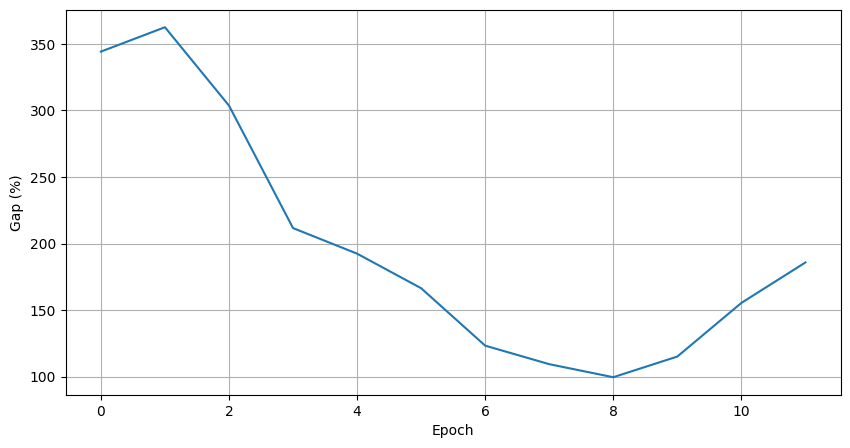

In [83]:

# p train.py --epoch_size 10000 --n_nodes 100 --run_name run0605 --batch_size 1000 --coef_value 1e-3
n_nodes = 100
curve(n_nodes, 'run0605')


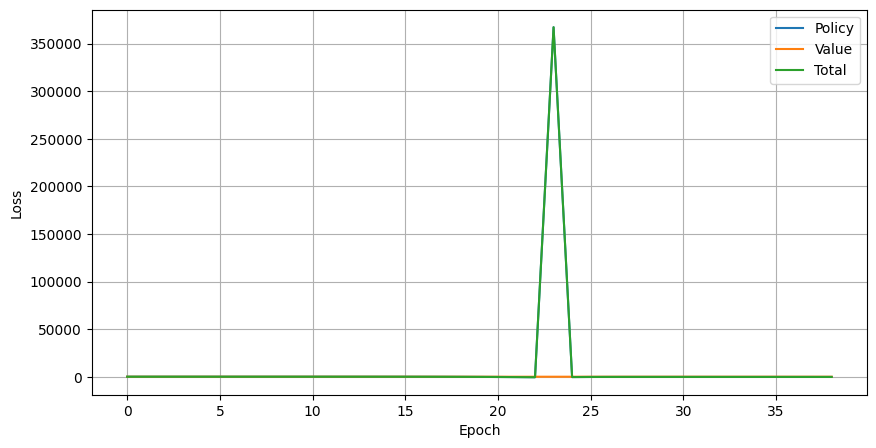

In [80]:

loss(100, 'run0605')#, range_y=[-.01, .02])
